<a href="https://www.kaggle.com/code/raullloriz/spotify-songs-popularity-analysis?scriptVersionId=130682731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spotify Songs Popularity Analysis

**Importamos las librerias**

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk import FreqDist

**Importamos y visualizamos el dataset**

In [2]:
df_spo = pd.read_csv('/kaggle/input/spotify-global-top-50-song-dataset/playlist.csv')
df_spo.head()

,track_name,track_add_date,track_add_time,multiple_artists_bool,name_of_artists,album_name,album_release_date,album_release_date_precision,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit,images_path,data_collection_date
0,Flowers,2023-03-31,10:02:16,False,['Miley Cyrus'],Endless Summer Vacation,2023-03-10,day,13,1,200600,87,False,./images/flowers_miley_cyrus.jpg,2023-03-31
1,Kill Bill,2023-03-31,10:02:16,False,['SZA'],SOS,2022-12-08,day,23,2,153946,94,False,./images/kill_bill_sza.jpg,2023-03-31
2,TQG,2023-03-31,10:02:16,True,"['KAROL G', 'Shakira']",MAÑANA SERÁ BONITO,2023-02-24,day,17,3,197933,97,True,./images/tqg_karol_g.jpg,2023-03-31
3,BESO,2023-03-31,10:02:16,True,"['ROSALÍA', 'Rauw Alejandro']",RR,2023-03-24,day,3,4,194543,87,False,./images/beso_rosala.jpg,2023-03-31
4,Boy's a liar Pt. 2,2023-03-31,10:02:16,True,"['PinkPantheress', 'Ice Spice']",Boy's a liar Pt. 2,2023-02-03,day,2,5,131013,97,False,./images/boys_a_liar_pt_2_pinkpantheress.jpg,2023-03-31


In [3]:
df_spo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   track_name                    350 non-null    object
 1   track_add_date                350 non-null    object
 2   track_add_time                350 non-null    object
 3   multiple_artists_bool         350 non-null    bool  
 4   name_of_artists               350 non-null    object
 5   album_name                    350 non-null    object
 6   album_release_date            350 non-null    object
 7   album_release_date_precision  350 non-null    object
 8   number_of_tracks_in_album     350 non-null    int64 
 9   position_in_playlist          350 non-null    int64 
 10  track_duration_ms             350 non-null    int64 
 11  track_popularity              350 non-null    int64 
 12  track_explicit                350 non-null    bool  
 13  images_path         

# Cleaning Data

**Limpiamos los duplicados usando el nombre de track como subset**

In [4]:
df_spo['track_name'].duplicated().value_counts()

True     290
False     60
Name: track_name, dtype: int64

In [5]:
df_spo.drop_duplicates(subset='track_name', inplace=True)

**Una vez limpio de duplicados Reiniciamos el index**

In [6]:
df_spo.reset_index(drop=True, inplace=True)

In [7]:
df_spo.head()

,track_name,track_add_date,track_add_time,multiple_artists_bool,name_of_artists,album_name,album_release_date,album_release_date_precision,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit,images_path,data_collection_date
0,Flowers,2023-03-31,10:02:16,False,['Miley Cyrus'],Endless Summer Vacation,2023-03-10,day,13,1,200600,87,False,./images/flowers_miley_cyrus.jpg,2023-03-31
1,Kill Bill,2023-03-31,10:02:16,False,['SZA'],SOS,2022-12-08,day,23,2,153946,94,False,./images/kill_bill_sza.jpg,2023-03-31
2,TQG,2023-03-31,10:02:16,True,"['KAROL G', 'Shakira']",MAÑANA SERÁ BONITO,2023-02-24,day,17,3,197933,97,True,./images/tqg_karol_g.jpg,2023-03-31
3,BESO,2023-03-31,10:02:16,True,"['ROSALÍA', 'Rauw Alejandro']",RR,2023-03-24,day,3,4,194543,87,False,./images/beso_rosala.jpg,2023-03-31
4,Boy's a liar Pt. 2,2023-03-31,10:02:16,True,"['PinkPantheress', 'Ice Spice']",Boy's a liar Pt. 2,2023-02-03,day,2,5,131013,97,False,./images/boys_a_liar_pt_2_pinkpantheress.jpg,2023-03-31


In [8]:
df_spo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   track_name                    60 non-null     object
 1   track_add_date                60 non-null     object
 2   track_add_time                60 non-null     object
 3   multiple_artists_bool         60 non-null     bool  
 4   name_of_artists               60 non-null     object
 5   album_name                    60 non-null     object
 6   album_release_date            60 non-null     object
 7   album_release_date_precision  60 non-null     object
 8   number_of_tracks_in_album     60 non-null     int64 
 9   position_in_playlist          60 non-null     int64 
 10  track_duration_ms             60 non-null     int64 
 11  track_popularity              60 non-null     int64 
 12  track_explicit                60 non-null     bool  
 13  images_path           

# Visualizamos los datos

## ¿Los tracks con colaboración son más populares?

In [9]:
df_spo['multiple_artists_bool'] = df_spo['multiple_artists_bool'].astype(bool)

In [10]:
df_spo['track_popularity'].mean()

82.46666666666667

<AxesSubplot:xlabel='multiple_artists_bool', ylabel='track_popularity'>

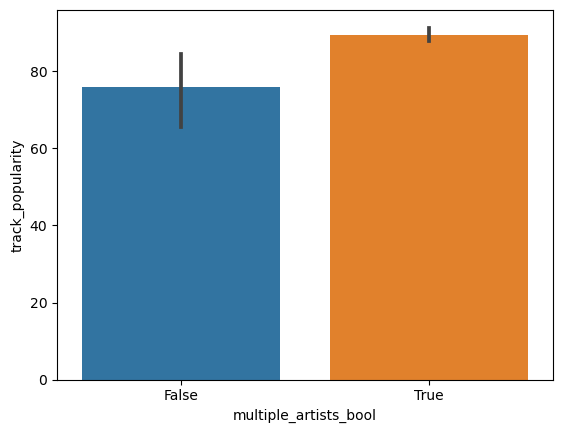

In [11]:
sns.barplot(y='track_popularity',x='multiple_artists_bool', data = df_spo)

In [12]:
label = df_spo['multiple_artists_bool'].value_counts()

<AxesSubplot:xlabel='track_popularity', ylabel='count'>

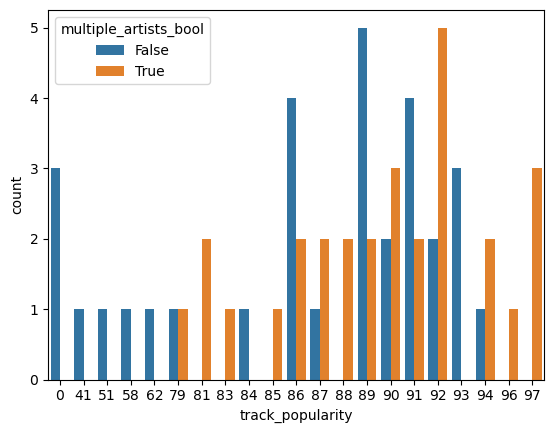

In [13]:
sns.countplot(data=df_spo, x='track_popularity', hue='multiple_artists_bool')

## ¿Que artistas son mas populares?

In [14]:
df_spo.head(5)

,track_name,track_add_date,track_add_time,multiple_artists_bool,name_of_artists,album_name,album_release_date,album_release_date_precision,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit,images_path,data_collection_date
0,Flowers,2023-03-31,10:02:16,False,['Miley Cyrus'],Endless Summer Vacation,2023-03-10,day,13,1,200600,87,False,./images/flowers_miley_cyrus.jpg,2023-03-31
1,Kill Bill,2023-03-31,10:02:16,False,['SZA'],SOS,2022-12-08,day,23,2,153946,94,False,./images/kill_bill_sza.jpg,2023-03-31
2,TQG,2023-03-31,10:02:16,True,"['KAROL G', 'Shakira']",MAÑANA SERÁ BONITO,2023-02-24,day,17,3,197933,97,True,./images/tqg_karol_g.jpg,2023-03-31
3,BESO,2023-03-31,10:02:16,True,"['ROSALÍA', 'Rauw Alejandro']",RR,2023-03-24,day,3,4,194543,87,False,./images/beso_rosala.jpg,2023-03-31
4,Boy's a liar Pt. 2,2023-03-31,10:02:16,True,"['PinkPantheress', 'Ice Spice']",Boy's a liar Pt. 2,2023-02-03,day,2,5,131013,97,False,./images/boys_a_liar_pt_2_pinkpantheress.jpg,2023-03-31


In [15]:
top_10_artist = df_spo[['name_of_artists','track_popularity']].sort_values(by='track_popularity', ascending=False).head(10)

In [16]:
top_10_artist

,name_of_artists,track_popularity
2,"['KAROL G', 'Shakira']",97
4,"['PinkPantheress', 'Ice Spice']",97
11,"['Bizarrap', 'Shakira']",97
9,"['Metro Boomin', 'The Weeknd', '21 Savage']",96
19,"['David Guetta', 'Bebe Rexha']",94
1,['SZA'],94
12,"['Rema', 'Selena Gomez']",94
38,['NewJeans'],93
24,['d4vd'],93
15,['Taylor Swift'],93


In [17]:
fig = px.funnel(top_10_artist, y = 'name_of_artists', x = 'track_popularity', title = "Top 10 Artist")
fig

## ¿Que palabras se repiten mas en los titulos?

In [18]:
df_spo['track_name']

0                                               Flowers
1                                             Kill Bill
2                                                   TQG
3                                                  BESO
4                                    Boy's a liar Pt. 2
5                                       Ella Baila Sola
6              Die For You (with Ariana Grande) - Remix
7                                             As It Was
8                                       La Bebe - Remix
9                Creepin' (with The Weeknd & 21 Savage)
10                                           Yandel 150
11                Shakira: Bzrp Music Sessions, Vol. 53
12                        Calm Down (with Selena Gomez)
13                                          Coco Chanel
14                                           Like Crazy
15                                            Anti-Hero
16                    All Of The Girls You Loved Before
17                            Unholy (feat. Kim 

In [19]:
df_spo['track_name'] = df_spo['track_name'].str.replace('.','')
df_spo['track_name'] = df_spo['track_name'].str.replace('(', '')
df_spo['track_name'] = df_spo['track_name'].str.replace(')', '')
df_spo['track_name'] = df_spo['track_name'].str.replace('-', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [20]:
def palabras_comunes(data,column):
    text = ' '.join(data[column])
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    palabras_mas_comunes = fdist.most_common(10)
    comun = pd.DataFrame(palabras_mas_comunes,columns=['Palabra', 'Repeticiones'])
    return comun

In [21]:
palabras_comunes(df_spo,'track_name')

,Palabra,Repeticiones
0,You,4
1,with,4
2,I,4
3,Me,4
4,La,3
5,:,3
6,Bzrp,3
7,Music,3
8,Sessions,3
9,",",3


**Las palabras que mas se repiten estan relacionadas con canciones de amor o que pueden hablar de amor**